# Branching and nested factors kriging

In [23]:
import Branching_Models_v2 as GP
import numpy as np
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
from torch import optim
import importlib
from matplotlib import pyplot as plt

torch.set_printoptions(precision=5)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

from matplotlib.ticker import LinearLocator, FormatStrFormatter

import functions as fcs
import fc_data_branching as fdb

# data generate

In [24]:
importlib.reload(fdb)
importlib.reload(fcs)

obj_case = fdb.branching_obj_bowl2
dataType = {'shareFactors':1, 'branchingFactors':1, 'branchingFactorsLevels':[3], 'nestedFactors':[1]}

# trainX = fdb.initial_datas()
# trainX = fdb.initial_datas_LHD(20)
# torch.save(trainX, './pic/meet1015/data/points20.pt')
trainX = torch.load('./pic/meet1015/data/points15.pt')
trainY = obj_case(fdb.dataTransfer(trainX, dataType))

# model define

In [28]:
# define model data type
importlib.reload(GP)
modelType = 'Branching_Kriging'
modelDataType = {'shareFactors':1, 'branchingFactors':1, 'branchingFactorsLevels':[3], 'nestedFactors':[1]}

if modelType == 'Branching_Kriging':
    model = GP.Branching_Kriging(**modelDataType)
    
elif modelType == 'Branching_GP':
    model = GP.Branching_GP(**modelDataType)
    
# elif modelType == 'Branching_Ind':
#     model = GP.Branching_Ind(**modelDataType)
    
# elif modelType == 'Branching_QQ':
#     model = GP.Branching_QQ(**modelDataType)
    
model.get_obj(obj_case)
model.train_datas(trainX=trainX, trainY=trainY)
optimizer = optim.Adam(model.parameters(), lr=0.1, betas=(0.9, 0.999))
model

Branching_Kriging(
  (gamma): ParameterList(  (0): Parameter containing: [torch.FloatTensor of size 1x3])
)

# model train

In [32]:
GP.train(model, optimizer, 100, show=True)

0 step -- Loss: 13.530000686645508
1 step -- Loss: 13.527132034301758
2 step -- Loss: 13.52430534362793
3 step -- Loss: 13.521525382995605
4 step -- Loss: 13.518783569335938
5 step -- Loss: 13.516082763671875
6 step -- Loss: 13.513420104980469
7 step -- Loss: 13.510796546936035
8 step -- Loss: 13.50821304321289
9 step -- Loss: 13.505664825439453
10 step -- Loss: 13.503152847290039
11 step -- Loss: 13.500675201416016
12 step -- Loss: 13.498234748840332
13 step -- Loss: 13.49582576751709
14 step -- Loss: 13.493452072143555
15 step -- Loss: 13.491108894348145
16 step -- Loss: 13.488797187805176
17 step -- Loss: 13.486515998840332
18 step -- Loss: 13.484268188476562
19 step -- Loss: 13.482047080993652
20 step -- Loss: 13.4798583984375
21 step -- Loss: 13.477697372436523
22 step -- Loss: 13.475563049316406
23 step -- Loss: 13.473456382751465
24 step -- Loss: 13.471378326416016
25 step -- Loss: 13.469324111938477
26 step -- Loss: 13.46729850769043
27 step -- Loss: 13.465296745300293
28 step 

In [35]:
model.print_parameters()

alpha: Parameter containing:
tensor([[8.52953]], requires_grad=True)
theta: Parameter containing:
tensor([[31.27519]], requires_grad=True)
noiseSigma: tensor([[1.00000e-06]])
gamma:
Parameter containing:
tensor([[0.50815, 4.89761, 5.86439]], requires_grad=True)


# 訓練得到新的點

In [71]:
# 1 real最小點: -6.473845958709717 index: 0.58 0.26
# 2 real最小點: -7.05384635925293 index: 0.58 0.84
# 3 real最小點: -6.733846187591553 index: 0.58 0.52
orignPoints, newPoints = GP.train_new_points(model, optimizer, 50, 20)
newPoints

[tensor([[0.45000, 2.00000, 0.50000]]),
 tensor([[0.50000, 2.00000, 0.40000]]),
 tensor([[0.55000, 1.00000, 0.70000]]),
 tensor([[0.50000, 3.00000, 0.50000]]),
 tensor([[0.40000, 3.00000, 0.60000]]),
 tensor([[0.30000, 2.00000, 0.45000]]),
 tensor([[0.55000, 3.00000, 0.50000]]),
 tensor([[0.50000, 3.00000, 0.55000]]),
 tensor([[0.40000, 1.00000, 0.55000]]),
 tensor([[0.50000, 3.00000, 0.40000]]),
 tensor([[0.35000, 2.00000, 0.55000]]),
 tensor([[0.40000, 2.00000, 0.40000]]),
 tensor([[1., 1., 0.]]),
 tensor([[0.00000, 2.00000, 0.45000]]),
 tensor([[0.85000, 2.00000, 1.00000]]),
 tensor([[0.50000, 2.00000, 0.00000]]),
 tensor([[0.25000, 2.00000, 0.30000]]),
 tensor([[0.55000, 3.00000, 0.45000]]),
 tensor([[1.00000, 3.00000, 0.25000]]),
 tensor([[0.40000, 3.00000, 0.45000]])]

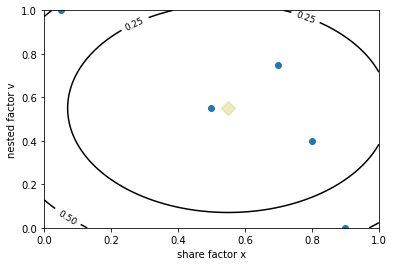

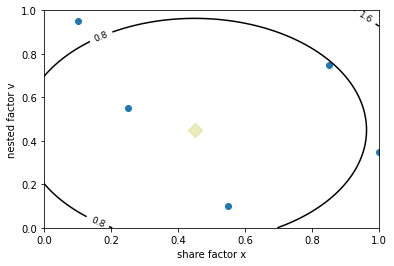

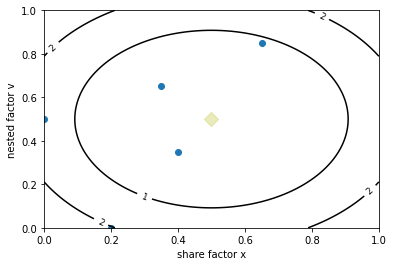

tensor(0.14977)

In [11]:
path = './pic/meet1015/case_Corellation/'
p = 15
ResultM.get_EIPoints_real_plot(1, trainX=trainX, EIpoints=model.trainX[p:, :],
                               file=path+'realEI_p{}_z1.png'.format(str(p)),
                               xtitle='share factor x', ytitle='nested factor v')
ResultM.get_EIPoints_real_plot(2, trainX=trainX, EIpoints=model.trainX[p:, :],
                               file=path+'realEI_p{}_z2.png'.format(str(p)),
                               xtitle='share factor x', ytitle='nested factor v')
ResultM.get_EIPoints_real_plot(3, trainX=trainX, EIpoints=model.trainX[p:, :],
                               file=path+'realEI_p{}_z3.png'.format(str(p)),
                               xtitle='share factor x', ytitle='nested factor v')
ResultM.get_result_MSE(model)

# 檢查結果

D:\study\成大\soa3\瑞彬\codes\gaussian_process\functions.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


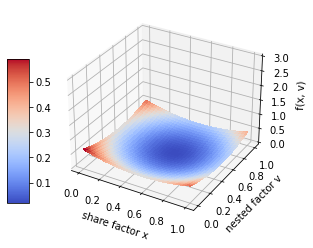

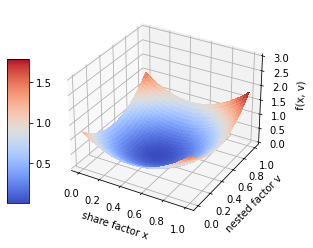

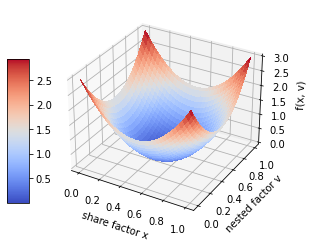

In [7]:
# figReal.savefig('./pics/picture_real_z{}.png'.format(zz))
# figPred.savefig('./pics/picture_pred_z{}.png'.format(zz))
# figEI.savefig('./pics/pictureEI_z{}.png'.format(zz))
# figContourLineEI.savefig('./pics/pictureContourLine_z{}.png'.format(zz))

importlib.reload(fdb)
importlib.reload(fcs)
ResultM = fdb.Result_class()
path = './pic/meet1015/case_Corellation/real/'
ResultM.real_plot(model, 1, [0, 3], show=True), 
ResultM.real_plot(model, 2, [0, 3], show=True), 
ResultM.real_plot(model, 3, [0, 3], show=True)
# , file=path+'real_3.png'

In [75]:
# 總 MSE
importlib.reload(fdb)
ResultM.get_result_MSE(model)

tensor(0.06677)

In [8]:
# ResultM.get_result_plot(model, 1, ZlimPred=[-6, 6], ZlimEI=[-0.01, 0.3])

In [9]:
# 單個 curve 資訊
# ResultM.get_result(model, 1)

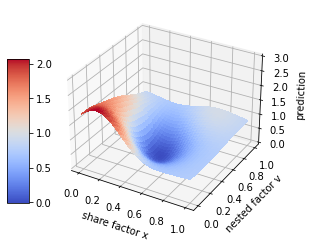

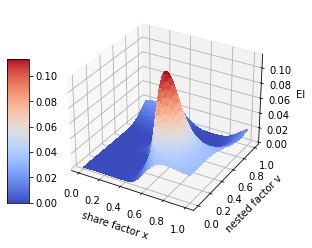

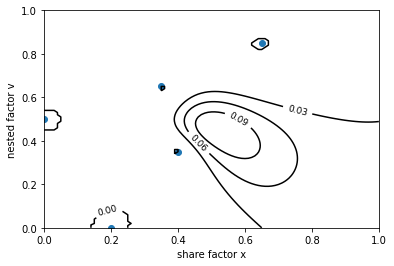

In [37]:
zi = 3
ResultM.get_plot(model, zi, ZlimPred=[0, 3])

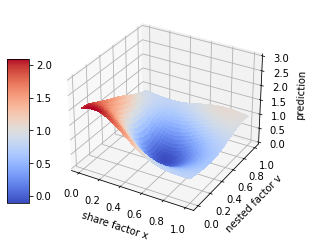

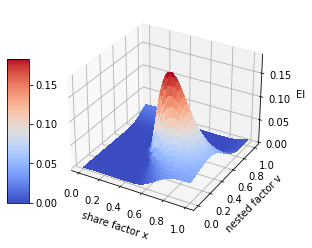

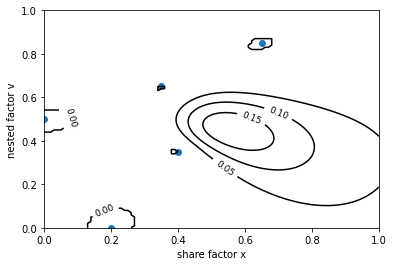

In [48]:
zi = 3
points = 15
predPath = './pic/meet1015/pred_p{}_z{}.png'.format(str(points), str(zi))
EIPath = './pic/meet1015/EI_p{}_z{}.png'.format(str(points), str(zi))
ContourEI = './pic/meet1015/ContourEI_p{}_z{}.png'.format(str(points), str(zi))
loadDataPath = './pic/meet1015/Data_p{}_z{}.pt'.format(str(points), str(zi))
ResultM.get_plot(model, zi, ZlimPred=[0, 3],
                 filesPred=predPath, filesEI=EIPath, filesContourEI=ContourEI, loadData=loadDataPath)

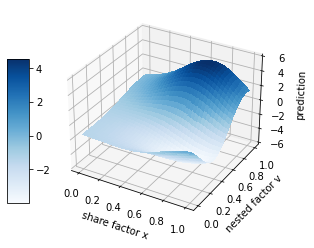

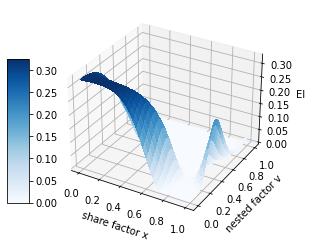

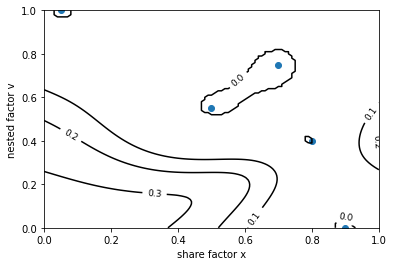

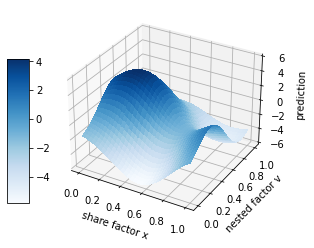

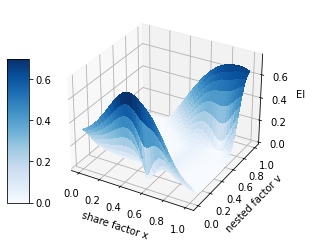

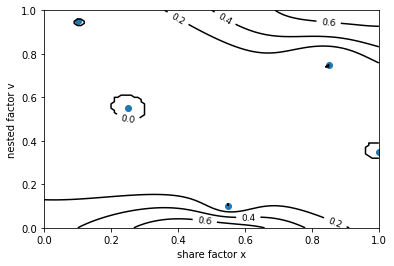

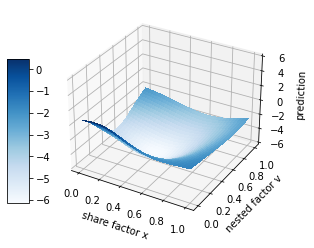

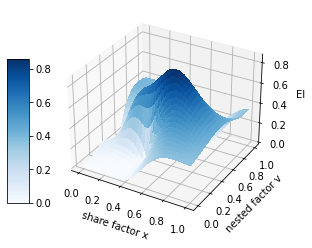

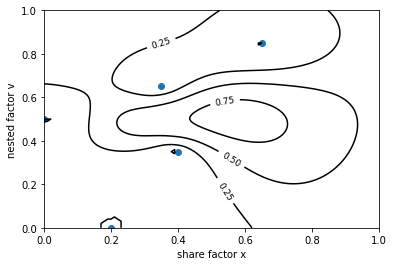

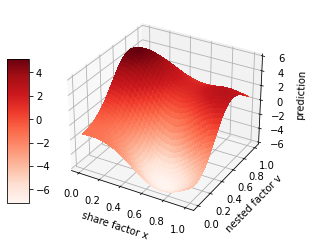

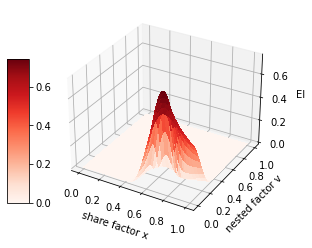

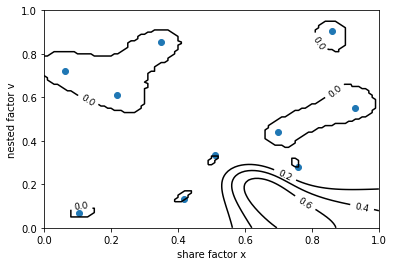

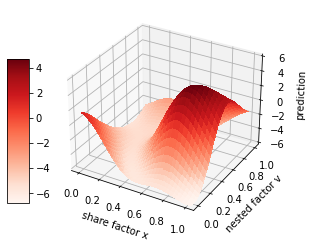

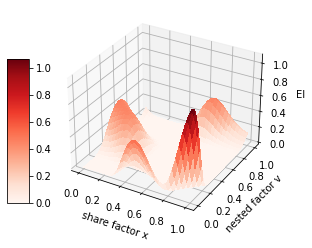

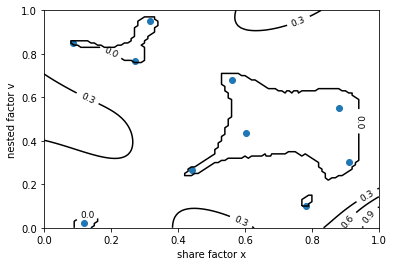

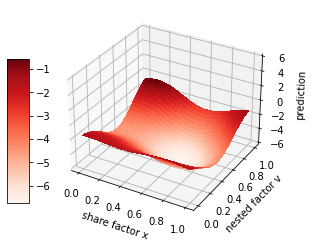

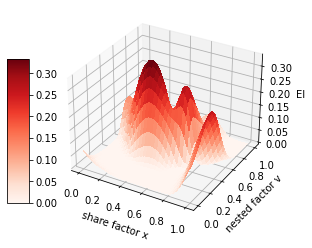

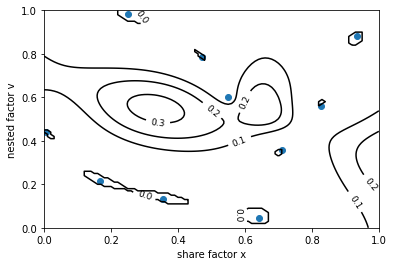

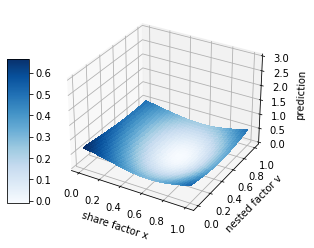

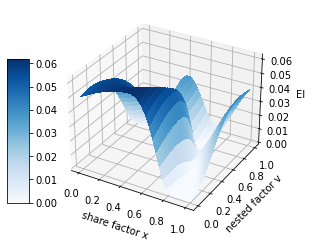

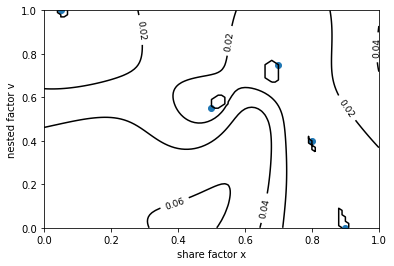

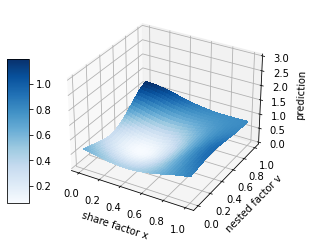

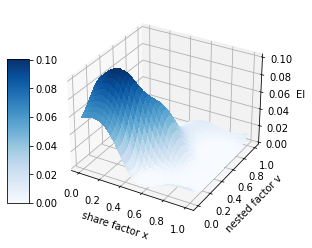

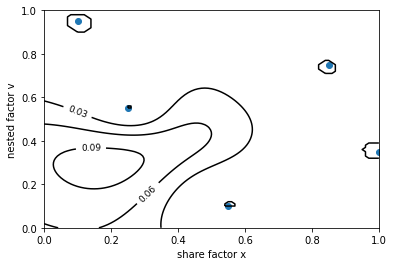

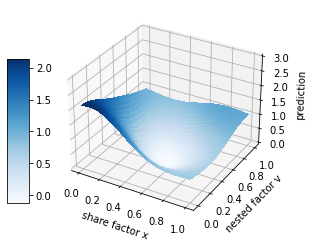

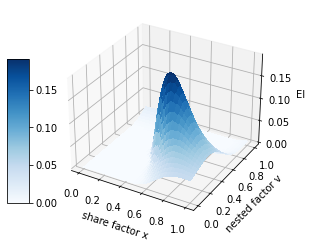

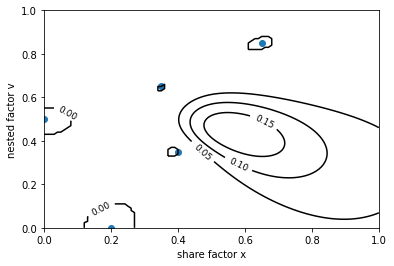

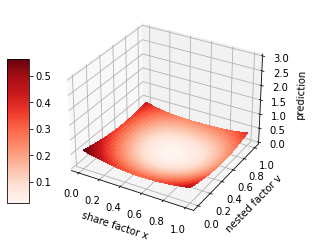

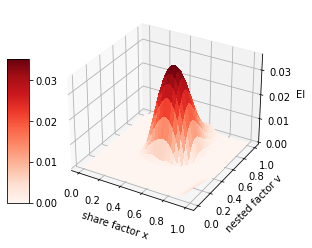

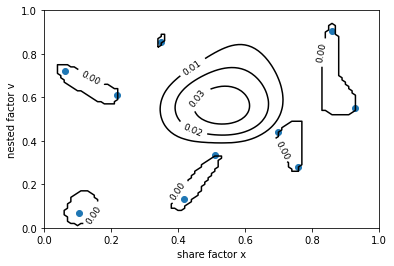

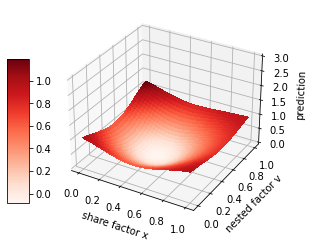

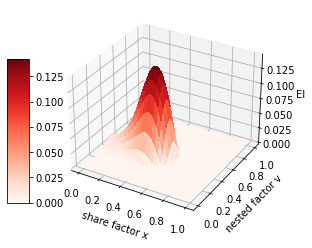

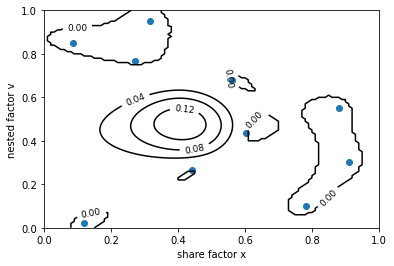

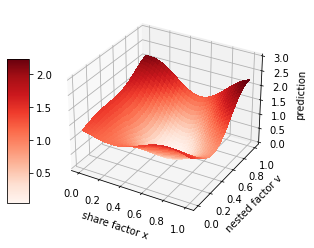

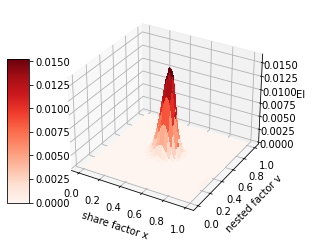

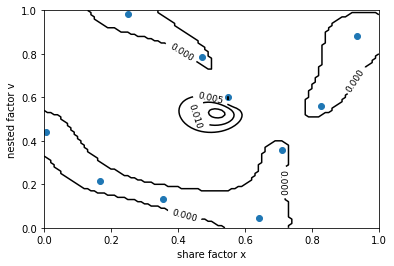

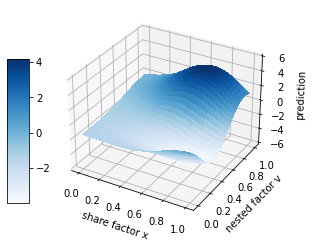

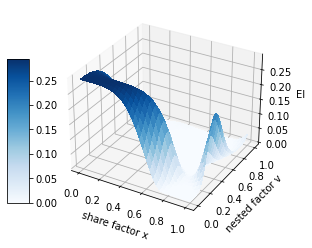

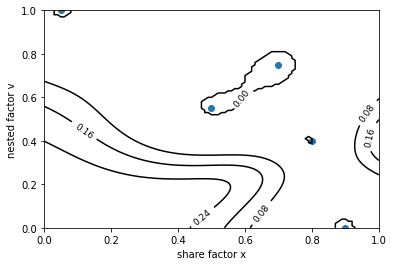

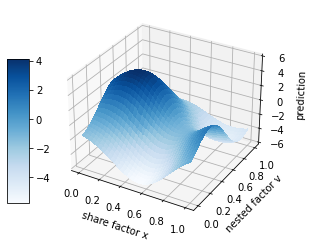

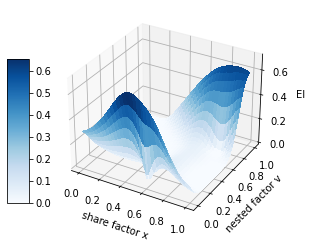

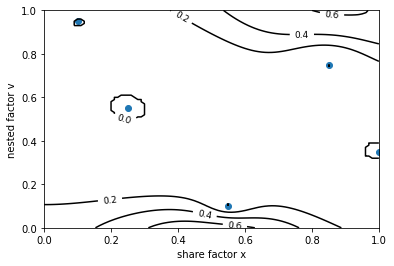

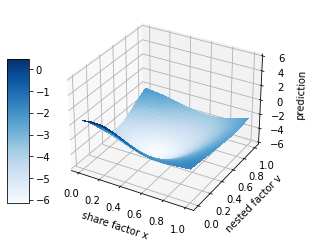

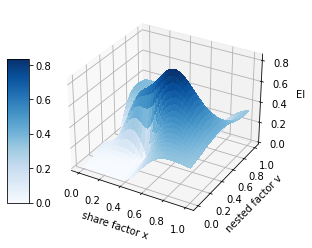

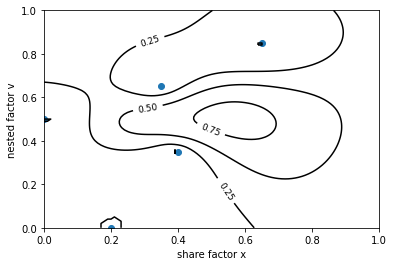

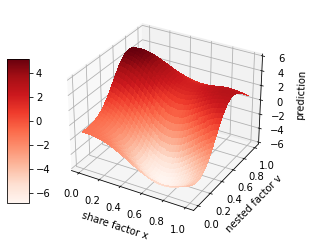

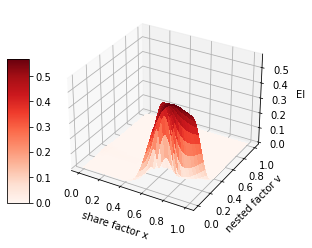

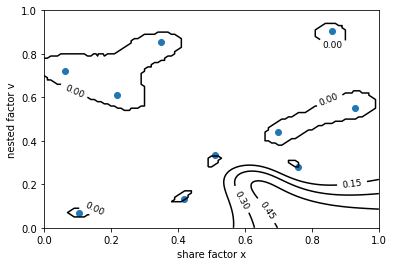

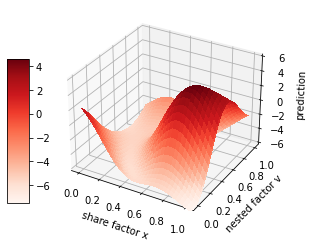

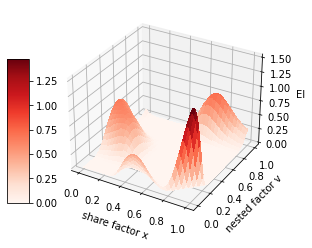

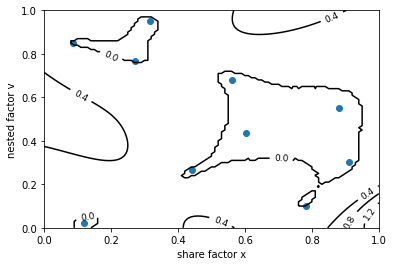

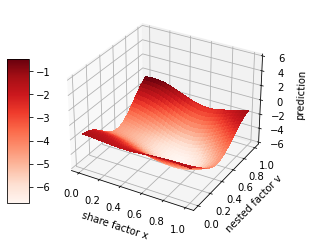

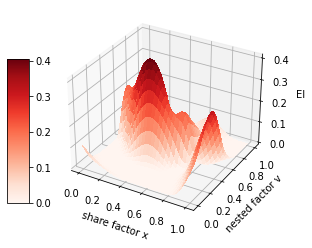

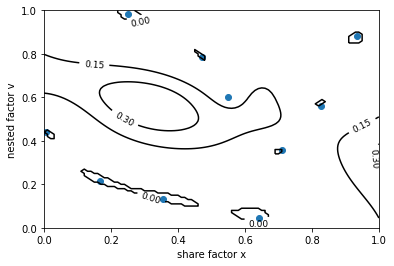

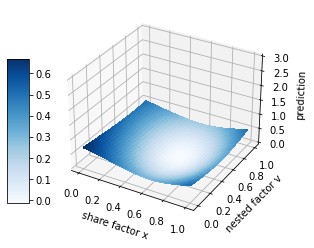

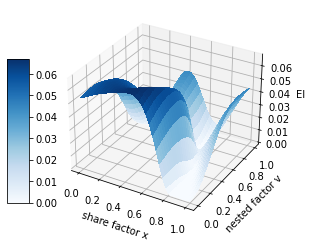

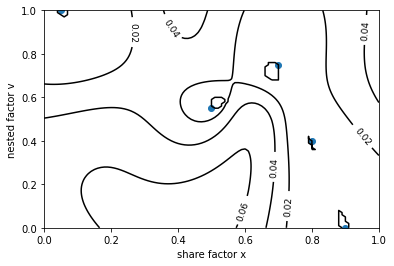

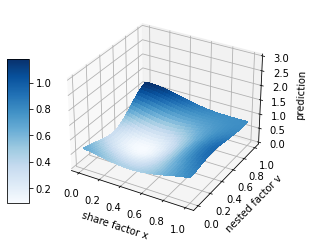

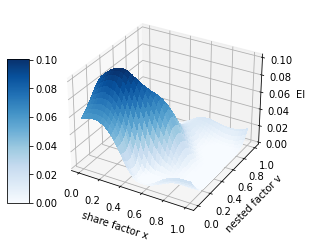

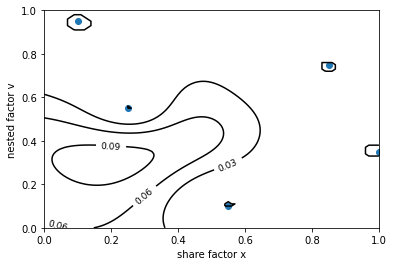

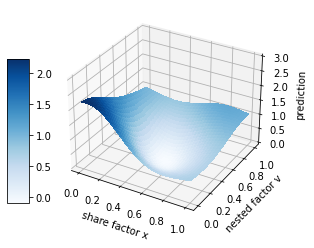

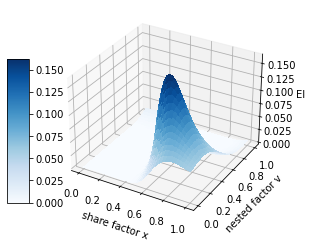

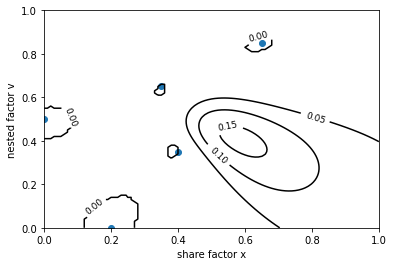

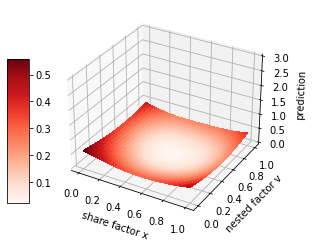

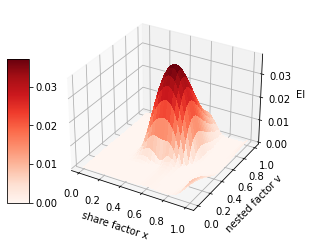

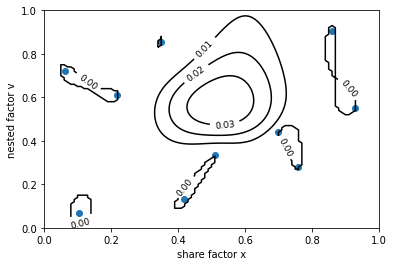

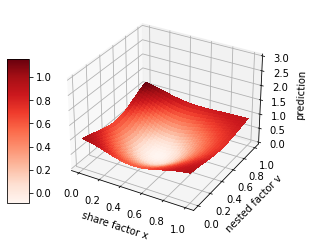

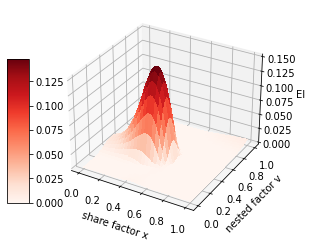

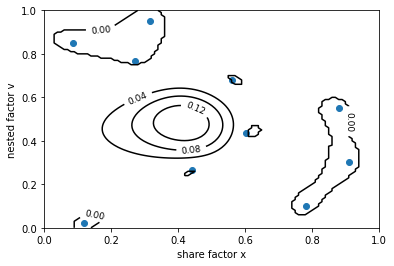

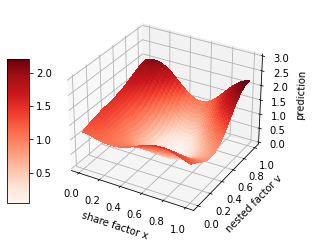

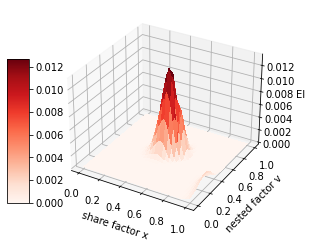

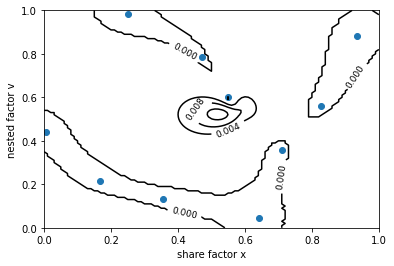

In [38]:
# 針對不同目標函式給出結果圖片
importlib.reload(fdb)
fdb.result_main3()

In [2]:
# 針對不同目標函式給出EI選點結果
importlib.reload(fdb)
EI30_iteration50 = fdb.result_main2_2(2, 10)
EI30_iteration50 = {'EI':torch.tensor(EI30_iteration50[0]), 'ratio':torch.tensor(EI30_iteration50[1])}
torch.save(EI30_iteration50, './pic/meet1015/result_points/EI30_iteration50.pt')

In [3]:
EI30_iteration50 = torch.load('./pic/meet1015/result_points/EI30_iteration50.pt')
EI30_iteration50

{'EI': tensor([[[[1000, 1000],
           [1000,    9]],
 
          [[1000, 1000],
           [   4,    4]]],
 
 
         [[[1000, 1000],
           [   9, 1000]],
 
          [[1000, 1000],
           [   4,    3]]]]),
 'ratio': tensor([[[[0.76743, 0.76743],
           [0.76743, 1.00000]],
 
          [[0.99010, 0.99010],
           [1.00000, 1.00000]]],
 
 
         [[[0.76743, 0.77613],
           [1.00000, 0.76743]],
 
          [[0.99010, 0.99010],
           [1.00000, 1.00000]]]])}

In [ ]:
# 針對不同目標函式給出 MSE
importlib.reload(fdb)
mse10 = fdb.result_main2_3(10)
torch.save(torch.tensor(mse10), './pic/meet1015/result_points/mse10.pt')

In [7]:
mse10 = torch.load('./pic/meet1015/result_points/mse_iteration50.pt')
mse10.mean(dim=3)

tensor([[[6.00228, 4.33233],
         [0.19659, 0.07802]],

        [[6.05680, 4.28609],
         [0.19678, 0.08122]]])

# 給出所有的結果圖片(針對五筆資料)

In [6]:
# importlib.reload(fdb)
# obj_case = fdb.branching_obj_case1_2
# fdb.result_main(obj_case)

# data MSE 畫圖

In [2]:
dataMSE = []
dataMSE.append(torch.load('./data/Branching_Kriging_MSE.pt'))
dataMSE.append(torch.load('./data/Branching_GP_MSE.pt'))
dataMSE.append(torch.load('./data/Branching_Ind_MSE.pt'))
dataMSE.append(torch.load('./data/Branching_QQ_MSE.pt'))
# dataMSE.append(torch.load('./data/Branching_MOGP_MSE.pt'))

In [3]:
dataMSE2 = []
dataMSEV = []
dataMSE2.append(dataMSE[0].mean(dim=0).numpy()), dataMSEV.append(dataMSE[0].std(dim=0).numpy())
dataMSE2.append(dataMSE[1].mean(dim=0).numpy()), dataMSEV.append(dataMSE[1].std(dim=0).numpy())
dataMSE2.append(dataMSE[2].mean(dim=0).numpy()), dataMSEV.append(dataMSE[2].std(dim=0).numpy())
dataMSE2.append(dataMSE[3].mean(dim=0).numpy()), dataMSEV.append(dataMSE[3].std(dim=0).numpy())

(None, None)

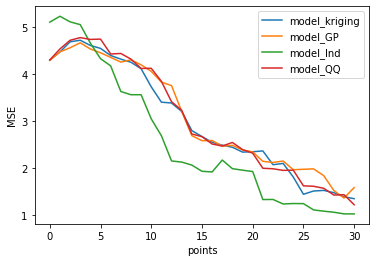

In [13]:
x = np.arange(0, 31)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, dataMSE2[0], label='model_kriging')
ax.plot(x, dataMSE2[1], label='model_GP')
ax.plot(x, dataMSE2[2], label='model_Ind')
ax.plot(x, dataMSE2[3], label='model_QQ')
ax.set_ylabel('MSE')
ax.set_xlabel('points')
plt.legend()
fig.savefig('MSE.png')

In [21]:
dataMSEV[3][[0, 10, 20, 30]]

array([1.6291655 , 1.0306661 , 0.8925066 , 0.45385727], dtype=float32)

In [13]:
# 0.55, 0.1
x = 0.55
v = 0.1
-1 * np.cos(7 / 4 * np.pi * (x - 1)) * np.exp(-0.2 * (x - 1)) + v + 5 * (np.sin(3 * np.pi * v))

5.00435856220275

# 模型重複多次計算找到幾次最小值

In [6]:
importlib.reload(fdb)
importlib.reload(fcs)
importlib.reload(GP)

p50 = fdb.result_main2(iteration=2, np=50)
# p40 = fdb.result_main2(iteration=100, np=40)
# torch.save(torch.tensor(p50), './data/p50.pt')
# torch.save(torch.tensor(p40), './data/p40.pt')

In [3]:
p50 = torch.load('./data/p50_4.pt')
# p40 = torch.load('./data/p40_2.pt')

In [7]:
p50

[[16, 17], [23, 24], [22, 17], [17, 14]]

In [11]:
(p50 <= 40).sum(dim=1)

tensor([83, 66, 99, 67])

In [5]:
p50.sum(dim=1), p40.sum(dim=1)

(tensor([93, 58, 98, 72]), tensor([86, 53, 99, 75]))

# 畫圖

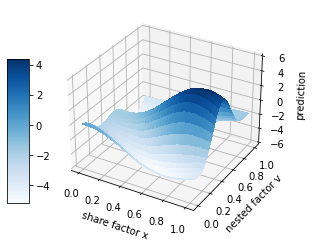

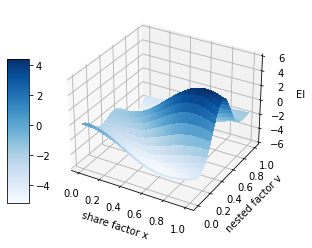

In [87]:
# 畫圖
importlib.reload(fcs)
d1, d2 = torch.load('./pic/meet1015/case_noCorellation/gb/p30/Data_z2.pt'), \
         torch.load('./pic/meet1015/case_noCorellation/sb/p30/Data_z2.pt')
xy1, xy2 = d1['xy'], d2['xy']
pred1, pred2 = d1['prediction'], d2['prediction']
EI1, EI2 = d1['EI'], d2['EI']
Zlim = [-6, 6]
cmap = 'Blues'
fig1 = fcs.plot3d(xy1[0].numpy(), xy1[1].numpy(), pred1.numpy(), Zlim=Zlim,
           xtitle='share factor x', ytitle='nested factor v', ztitle='prediction', cmap=cmap)

fig2 = fcs.plot3d(xy2[0].numpy(), xy2[1].numpy(), pred2.numpy(), Zlim=Zlim,
           xtitle='share factor x', ytitle='nested factor v', ztitle='EI', cmap=cmap)

fig1.savefig('./pic/meet1015/1.png')
fig2.savefig('./pic/meet1015/2.png')

In [84]:
EI1 == EI2

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

In [51]:
pred2

tensor([[0.87536, 0.87684, 0.87808,  ..., 0.92739, 0.91553, 0.90439],
        [0.88439, 0.88604, 0.88742,  ..., 0.92725, 0.91536, 0.90421],
        [0.89409, 0.89592, 0.89746,  ..., 0.92636, 0.91452, 0.90341],
        ...,
        [1.26448, 1.29487, 1.32578,  ..., 1.80798, 1.79596, 1.78140],
        [1.26448, 1.29497, 1.32599,  ..., 1.77187, 1.76022, 1.74613],
        [1.26288, 1.29335, 1.32436,  ..., 1.73370, 1.72245, 1.70887]])

# try

In [89]:
modelType = 'Branching_Kriging'
modelDataType = {'shareFactors':1, 'branchingFactors':1, 'branchingFactorsLevels':[3], 'nestedFactors':[1]}

if modelType == 'Branching_Kriging':
    model = GP.Branching_Kriging(**modelDataType)
    
elif modelType == 'Branching_GP':
    model = GP.Branching_GP(**modelDataType)

obj_case = fdb.branching_obj_case6
dataType = {'shareFactors':1, 'branchingFactors':1, 'branchingFactorsLevels':[3], 'nestedFactors':[1]}

trainX = fdb.initial_datas()
trainY = obj_case(fdb.dataTransfer(trainX, dataType))    

model.get_obj(obj_case)
model.train_datas(trainX=trainX, trainY=trainY)
optimizer = optim.Adam(model.parameters(), lr=0.1, betas=(0.9, 0.999))

In [90]:
W = model.every_points()
WY = obj_case(model.data_transfer(W))
maI = WY.argmin()
maw = W[maI, :]
GP.train(model, optimizer, 600)
orignPoints, newPoints = GP.train_new_points(model, optimizer, 50, 50)
newPoints = torch.cat(newPoints, dim=0)

In [91]:
for n in range(newPoints.shape[0]):
    c1 = newPoints[n, 1].item() == maw[1].item()
    c2 = torch.sqrt(((newPoints[n, [True, False, True]] - maw[[True, False, True]]) ** 2).sum())
    if c1 and c2 <= 0.05:
        print('y', n)

y 13
y 28
y 29
y 30
y 31
y 32
y 33
y 36
y 37
y 39
y 40
y 43
y 46


In [76]:
maw, newPoints

(tensor([0.40000, 2.00000, 0.85000]),
 tensor([[0.35000, 3.00000, 0.50000],
         [0.55000, 3.00000, 0.50000],
         [0.45000, 3.00000, 0.50000],
         [0.35000, 2.00000, 0.00000],
         [0.75000, 2.00000, 0.05000],
         [0.50000, 2.00000, 0.25000],
         [0.15000, 3.00000, 0.70000],
         [0.60000, 3.00000, 0.30000],
         [0.80000, 3.00000, 0.55000],
         [0.50000, 3.00000, 0.60000],
         [1.00000, 1.00000, 0.35000],
         [1.00000, 3.00000, 0.30000],
         [0.75000, 2.00000, 0.95000],
         [0.35000, 3.00000, 1.00000],
         [0.40000, 3.00000, 0.55000],
         [0.65000, 2.00000, 0.20000],
         [0.40000, 3.00000, 0.50000],
         [0.40000, 3.00000, 0.55000],
         [0.45000, 3.00000, 0.50000],
         [0.45000, 3.00000, 0.55000],
         [0.45000, 3.00000, 0.55000],
         [0.40000, 3.00000, 0.55000],
         [0.45000, 3.00000, 0.55000],
         [0.45000, 3.00000, 0.50000],
         [0.50000, 3.00000, 0.55000],
         [0.

In [29]:
torch.tensor([5]).item() == torch.tensor([5]).item()

True